In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vega_datasets import data

In [96]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [98]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')
df = df.set_index('date')

In [39]:
df_mean = df.resample('D').mean()
df_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


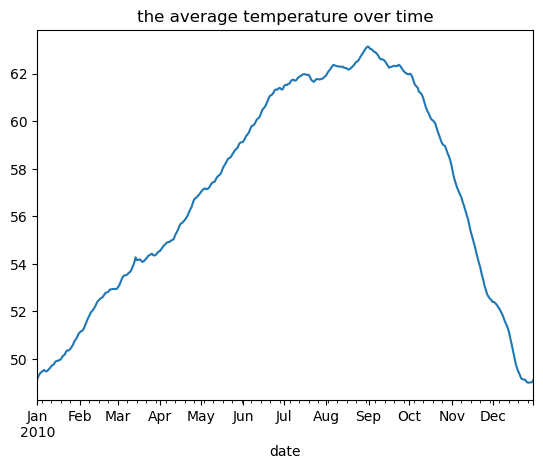

In [40]:
df_mean.temp.plot()

plt.title('the average temperature over time')
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

In [48]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [49]:
df_min = df.resample('d').min()

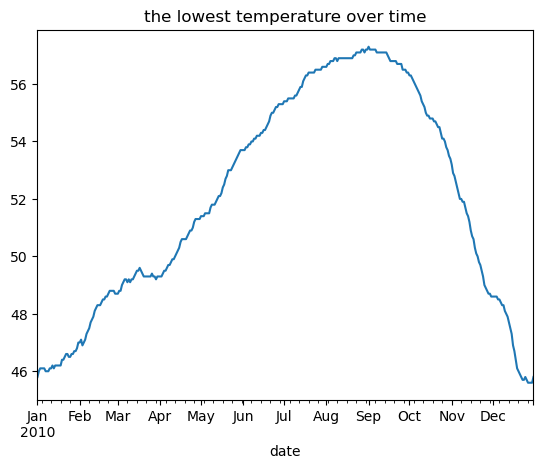

In [50]:
df_min.temp.plot()

plt.title('the lowest temperature over time')
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

In [145]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [146]:
df_max = df.resample('d').max()
df_max.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


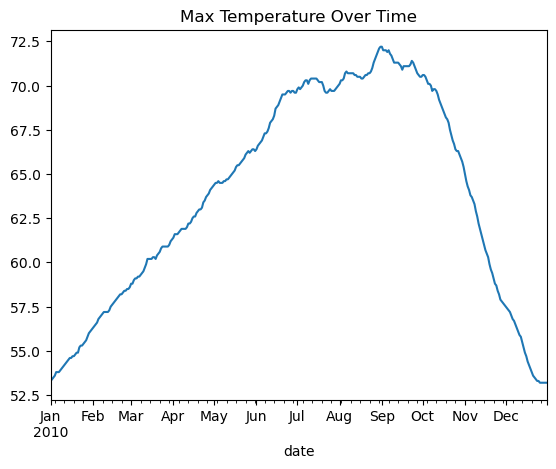

In [95]:
df_max.temp.plot()
plt.title('Max Temperature Over Time')
plt.show()

4. Which month is the coldest, on average?

In [90]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [106]:
# create month columns
cold_month = df.resample('M').mean()
cold_month.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

5. Which month has the highest average temperature?

In [107]:
hot_month = df.resample('M').mean()
hot_month.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [121]:
mm_df = df.resample('D').agg(['min', 'max'])
mm_df.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [137]:
mm_df['temperature_change'] = mm_df['temp']['max'] - mm_df['temp']['min']
mm_df.head()

temp       temperature_change
             min   max                   
date                                     
2010-01-01  45.8  53.3                7.5
2010-01-02  46.0  53.4                7.4
2010-01-03  46.1  53.5                7.4
2010-01-04  46.1  53.6                7.5
2010-01-05  46.1  53.8                7.7

In [138]:
mm_df.temperature_change.idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [141]:
mmm_df = df.resample('D').agg(['min', 'mean', 'max'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 40.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


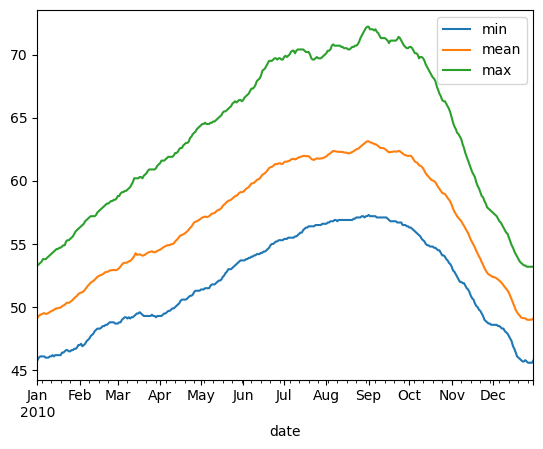

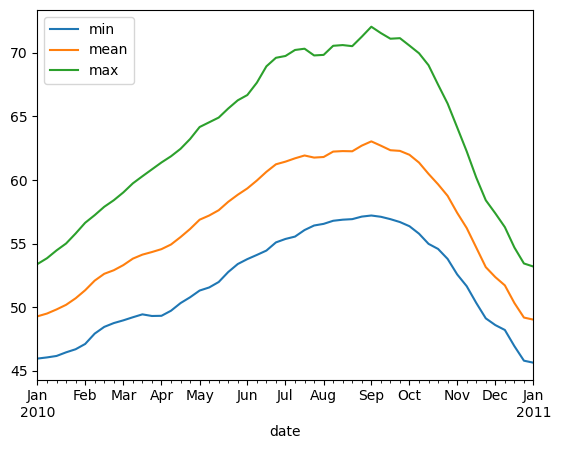

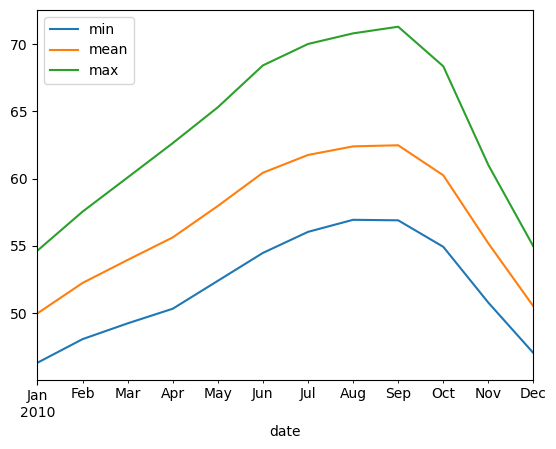

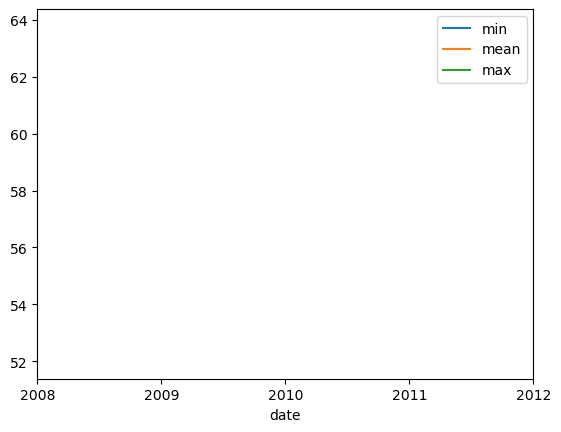

In [144]:
mmm_df.temp.plot(label='daily')
mmm_df.resample('W').mean().temp.plot(label='weekly')
mmm_df.resample('M').mean().temp.plot(label='monthly')
mmm_df.resample('Y').mean().temp.plot(label='yearly')

plt.legend()
plt.show()

1. Which year and month combination has the highest amount of precipitation?

In [151]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [155]:
df = df.set_index('date')

In [161]:
avg_df = df.resample('M').mean()

In [164]:
avg_df.precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

2. Visualize the amount of monthly precipitation over time.

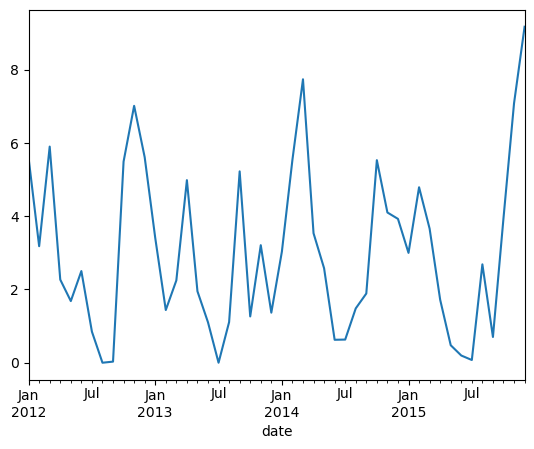

In [166]:
df.resample('M').mean().precipitation.plot(label='monthly')
plt.title('Precipitation monthly')
plt.show()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


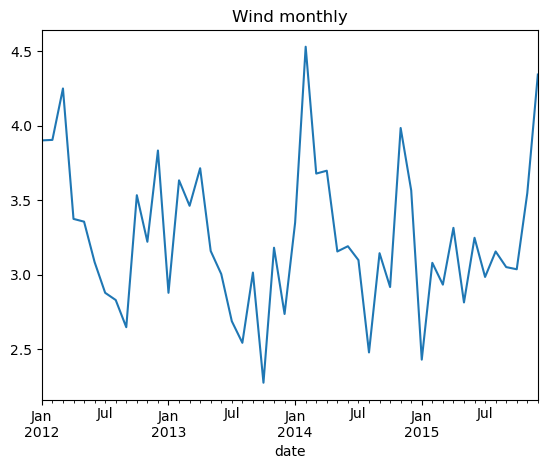

In [168]:
df.resample('M').mean().wind.plot(label='monthly')
plt.title('Wind monthly')
plt.show()

4. Which year-month combination is the windiest?

In [169]:
avg_df.wind.idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [182]:
sun_subset = df[df.weather=="sun"]

In [196]:
sun_subset.resample('Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180
